In [1]:
words = open('names.txt').read().splitlines()

In [2]:
import torch
torch.set_printoptions(sci_mode=False)

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [4]:
# create training set of bigrams (x,y) x is first char, y is next char
xs, ys = [], [] # training data, inputs & targets (labels)

for w in words[:1]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    print(ch1, ch2)
    xs.append(ix1)
    ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [5]:
xs

tensor([ 0,  5, 13, 13,  1])

In [6]:
ys

tensor([ 5, 13, 13,  1,  0])

In [7]:
# You cannot plugin an integer index into a neuaral net input layer,
# a common way is to use one-hot encoding
# alternative is embedding

In [8]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float() # 27 is vocab length
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [9]:
# here 5 is the number of all rows, each num is an example for NN
xenc.shape

torch.Size([5, 27])

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

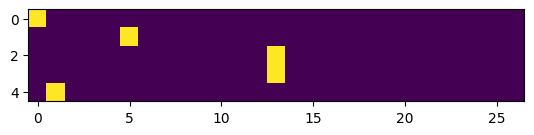

In [11]:
plt.imshow(xenc)

In [21]:
xenc.dtype # floats can feed into NNs, integers cannot

torch.float32

In [22]:
# weights for a single input neuron,
# they would get multiplied by the inputs
# W = torch.randn((27,1)) # 1 means 1 single neuron
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27)) # last 27 means 27 neurons
W

tensor([[     0.6185,      0.1086,     -1.1273,     -1.0633,      0.5411,
             -0.4729,      0.5715,      0.8517,      0.5346,     -0.4223,
             -0.2711,     -0.2821,      1.3404,     -1.0604,      1.8775,
             -1.2478,      1.2015,      0.2475,      0.1720,     -1.5493,
             -0.0518,      0.9093,      1.1958,     -0.2353,     -0.7321,
              0.4283,     -0.1908],
        [     0.9048,     -0.0429,      0.1731,      0.6941,     -0.0184,
              0.0519,      0.0723,      1.6095,      1.4492,     -1.5868,
             -0.8741,     -0.4049,      1.1798,     -0.8427,      2.4752,
             -1.4257,      0.2046,      0.5211,     -2.1498,      0.4892,
             -3.0333,      1.9435,     -0.2906,      1.9726,     -2.1114,
              0.4876,      1.5974],
        [     2.4475,     -1.1140,     -0.4240,      0.9721,     -1.1362,
              0.2693,     -0.2806,     -0.2900,      1.4563,     -0.3470,
             -0.2047,     -1.6099,      

In [23]:
# multiply one-hot encoded input with weights, matrix multiplication
xenc @ W

tensor([[ 0.6185,  0.1086, -1.1273, -1.0633,  0.5411, -0.4729,  0.5715,  0.8517,
          0.5346, -0.4223, -0.2711, -0.2821,  1.3404, -1.0604,  1.8775, -1.2478,
          1.2015,  0.2475,  0.1720, -1.5493, -0.0518,  0.9093,  1.1958, -0.2353,
         -0.7321,  0.4283, -0.1908],
        [ 0.6037, -0.4101, -0.5221, -0.2234,  0.5808, -0.1093, -1.2373,  0.4862,
          0.2107,  0.3666, -0.3545, -0.7347,  1.6910,  0.9798, -0.5625, -0.4817,
          1.8258,  0.6333, -1.7044,  0.5344, -0.8404, -0.7661,  0.6371, -0.3895,
          0.5160,  0.6658, -0.7926],
        [ 0.1501,  1.3657, -2.5121, -1.1937, -0.6937,  0.4379,  0.0884, -0.1753,
         -0.6446, -0.5381,  0.2052, -1.1520,  1.3022,  1.7582, -0.1419,  0.4483,
          0.8165, -1.5402,  0.4907,  1.0945, -0.8329, -1.9147, -0.6949, -0.7988,
         -1.0426, -0.8250, -0.5682],
        [ 0.1501,  1.3657, -2.5121, -1.1937, -0.6937,  0.4379,  0.0884, -0.1753,
         -0.6446, -0.5381,  0.2052, -1.1520,  1.3022,  1.7582, -0.1419,  0.4483

In [24]:
# 3, 13 is the firing rate of 13th neuron on the 3rd input
# this is achieved by the dot product betwen the input
# and the 13th column of the W (weights) matrix
#
# Matrix multiplications allow to evaluate dot product (w1*i1 + w2*i2 + ...) in paralel
(xenc @ W)[3,13]

tensor(1.7582)

In [30]:
xenc[3]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
W[:,13]

tensor([-0.9796,  0.1475, -1.8490, -0.8161, -0.2210, -0.0869, -0.2783, -1.7039,
         0.9756,  0.9659,  1.1439, -0.6201,  0.8191, -1.3979, -0.5276, -2.8809,
         0.9757,  0.1932,  0.0943, -1.1195, -1.8835, -1.0973,  0.0888,  0.4025,
         1.2505,  0.5417, -0.2581])

In [32]:
# This is W*x dot product
(xenc[3] * W[:,13]).sum()

tensor(-1.3979)

In [33]:
# (5, 27) @ (27, 1) matrix multiplication
# 5 is number of total inputs, 1 is number of neurons
# 27s would multiply and add
# these are 5 activasions
# We feed all (5) samples into the single neuron
# This is the result of W*x+b but there's no b (bias)

# (5,27) @ (27,27) -> (5,27)
# 5 is the number of inputs, 27 (last in second matrix) is the number of neurons


In [34]:
# So we fed our 27 dimensional inputs into a
# first layer of the neural net that has 27 neurons

In [29]:
logits = xenc @ W # log counts
counts = logits.exp() # equivalent to N counts
probs = counts / counts.sum(1, keepdim=True)
probs

tensor([[0.0449, 0.0270, 0.0078, 0.0084, 0.0416, 0.0151, 0.0428, 0.0567, 0.0413,
         0.0159, 0.0184, 0.0182, 0.0924, 0.0084, 0.1581, 0.0069, 0.0804, 0.0310,
         0.0287, 0.0051, 0.0230, 0.0600, 0.0800, 0.0191, 0.0116, 0.0371, 0.0200],
        [0.0467, 0.0170, 0.0152, 0.0204, 0.0457, 0.0229, 0.0074, 0.0415, 0.0315,
         0.0369, 0.0179, 0.0123, 0.1386, 0.0681, 0.0146, 0.0158, 0.1586, 0.0481,
         0.0046, 0.0436, 0.0110, 0.0119, 0.0483, 0.0173, 0.0428, 0.0497, 0.0116],
        [0.0342, 0.1153, 0.0024, 0.0089, 0.0147, 0.0456, 0.0321, 0.0247, 0.0154,
         0.0172, 0.0361, 0.0093, 0.1082, 0.1707, 0.0255, 0.0461, 0.0666, 0.0063,
         0.0480, 0.0879, 0.0128, 0.0043, 0.0147, 0.0132, 0.0104, 0.0129, 0.0167],
        [0.0342, 0.1153, 0.0024, 0.0089, 0.0147, 0.0456, 0.0321, 0.0247, 0.0154,
         0.0172, 0.0361, 0.0093, 0.1082, 0.1707, 0.0255, 0.0461, 0.0666, 0.0063,
         0.0480, 0.0879, 0.0128, 0.0043, 0.0147, 0.0132, 0.0104, 0.0129, 0.0167],
        [0.0396, 0.0154,

In [30]:
probs[0].sum() # a single row of probabilities should sum to 1

tensor(1.0000)

In [31]:
probs.shape

torch.Size([5, 27])

In [33]:
# Now for every of 5 input examples we have a row
# that came out of a neural net

# Agian, say for the first char '.' from the example
# To feed '.' into a neural net:
# 1. We got its index
# 2. One hot encoded it
# 3. Then it went into the neural net
# 4. Probalility distributions came out as an output

In [34]:
# these are probabilities for '.' to come next
probs[0] # [0] is '.'

tensor([0.0449, 0.0270, 0.0078, 0.0084, 0.0416, 0.0151, 0.0428, 0.0567, 0.0413,
        0.0159, 0.0184, 0.0182, 0.0924, 0.0084, 0.1581, 0.0069, 0.0804, 0.0310,
        0.0287, 0.0051, 0.0230, 0.0600, 0.0800, 0.0191, 0.0116, 0.0371, 0.0200])

In [35]:
# Now we need to optimize weights W to have good probabilities,
# "good" is measured by the loss function

In [36]:
# SUMMARY ------------------------------>>>>

In [37]:
xs # inputs to the neural net

tensor([ 0,  5, 13, 13,  1])

In [38]:
ys # labels for the correct next char in a sequence

tensor([ 5, 13, 13,  1,  0])

In [51]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

In [52]:
# THIS IS THE FORWARD PASS!!!
# all below are differentiable operations and we can backpropagate through
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax' layer in the NN
# this is a normalization/activation function used to make NN output probabilities

In [53]:
# For every single example we have a vector of probabilities that sum to 1
probs.shape

torch.Size([5, 27])

In [54]:
# LOSS IS AN AVERAGE LOG LIKELIHOOD!!!
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286250479519367
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

In [55]:
# We can minimize the loss by tuning W (weights) by computing
# the gradients of the loss with the respect to these W matrices
# and so we did tune W to minimize the loss to find the good setting
# for W using gradient based optimization

In [60]:
xs

tensor([ 0,  5, 13, 13,  1])

In [62]:
ys

tensor([ 5, 13, 13,  1,  0])

In [61]:
# Our NN is a single linear layer followed by softmax

# Negative log likelihood is used for classification
# Mean squared error is used for regression

# Calculating loss:
# looking at probs[0, 5] for the first example/row
# looking at probs[1, 13] for the second example/row
# looking at probs[2, 13] for the third example/row
# looking at probs[3, 1] for the third example/row
# looking at probs[4, 0] for the third example/row

In [63]:
# these are probabilities we actually need
probs[0,5], probs[1,13], probs[2,13], probs[3,1], probs[4,0]

(tensor(0.0123),
 tensor(0.0181),
 tensor(0.0267),
 tensor(0.0737),
 tensor(0.0150))

In [65]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [67]:
# this is the torch way to get them
probs[torch.arange(5), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150])

In [68]:
# ------------ !!! OPTIMIZATION !!! (manual) --------------

In [69]:
xs # inputs

tensor([ 0,  5, 13, 13,  1])

In [70]:
ys # labels

tensor([ 5, 13, 13,  1,  0])

In [172]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [171]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdim=True)
loss = -probs[torch.arange(5), ys].log().mean()

In [120]:
print(loss.item())

3.6891887187957764


In [117]:
# backward pass
W.grad = None # set gradients of weigts to 0
loss.backward()

In [96]:
W.shape

torch.Size([27, 27])

In [97]:
# Every element of W.grad is telling us the influence
# of that weight on the loss function
W.grad

tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0476,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1970,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0198,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [118]:
# Optimize weights where 0.1 is learning rate
W.data += -0.1 * W.grad

In [121]:
# Doing forward --> backward --> optimize is called "doing gradient descent"

In [122]:
# --------- !!! OPTIMIZATION !!! (automatic) --------------

In [187]:
# create the dataset
xs, ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


In [190]:
# gradient descent (training a net!)
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdim=True) # probabilities for next character
  # 0.01*(W**2).mean() is a loss regularization
  # 0.01 is regularization strength, it's like controlling N + how much in array mode
  # It's a gravity force that pushes W to be 0
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad


2.4834256172180176
2.4833855628967285
2.4833483695983887
2.4833130836486816
2.4832799434661865
2.4832475185394287
2.4832165241241455
2.483186960220337
2.4831581115722656
2.4831299781799316
2.483103036880493
2.483076333999634
2.48305082321167
2.4830257892608643
2.483001232147217
2.4829773902893066
2.482954263687134
2.48293137550354
2.4829089641571045
2.4828872680664062
2.482866048812866
2.482844829559326
2.4828243255615234
2.482804298400879
2.4827847480773926
2.482764959335327
2.48274564743042
2.48272705078125
2.482708215713501
2.4826903343200684
2.4826724529266357
2.4826550483703613
2.482637405395508
2.4826204776763916
2.4826037883758545
2.4825873374938965
2.4825708866119385
2.4825544357299805
2.482538938522339
2.482523202896118
2.4825077056884766
2.482492446899414
2.4824774265289307
2.4824626445770264
2.482448101043701
2.482433557510376
2.48241925239563
2.482405185699463
2.482390880584717
2.482377052307129
2.48236346244812
2.4823501110076904
2.4823367595672607
2.4823238849639893
2.482

In [ ]:
# W.exp() is essentially an N, but N was filled by counting
# and W was initialized randomly and we let loss to guide us
# to the exact same array

# Later on with adding complexity to the neural net
# Only forward pass would change, the rest, e.g. backpropagation
# weights updates would remain the same

In [193]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
